In [1]:
from pyspark.sql import SparkSession, SQLContext
import pyspark.sql.types as T
import pyspark
import pyspark.sql.functions as F
import seaborn as sns
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["axes.titlesize"] = 40
plt.rcParams["axes.labelsize"] = 15

In [3]:
data_dir = "../data/uber/uber-trip-data/"
uber_files = glob.glob(data_dir + '*.csv') 
uber_files

['../data/uber/uber-trip-data/uber-raw-data-jun14.csv',
 '../data/uber/uber-trip-data/uber-raw-data-may14.csv',
 '../data/uber/uber-trip-data/taxi-zone-lookup.csv',
 '../data/uber/uber-trip-data/uber-raw-data-jul14.csv',
 '../data/uber/uber-trip-data/uber-raw-data-sep14.csv',
 '../data/uber/uber-trip-data/uber-raw-data-apr14.csv',
 '../data/uber/uber-trip-data/uber-raw-data-aug14.csv']

In [4]:
uber_files.remove('../data/uber/uber-trip-data/taxi-zone-lookup.csv')

In [5]:
uber_files

['../data/uber/uber-trip-data/uber-raw-data-jun14.csv',
 '../data/uber/uber-trip-data/uber-raw-data-may14.csv',
 '../data/uber/uber-trip-data/uber-raw-data-jul14.csv',
 '../data/uber/uber-trip-data/uber-raw-data-sep14.csv',
 '../data/uber/uber-trip-data/uber-raw-data-apr14.csv',
 '../data/uber/uber-trip-data/uber-raw-data-aug14.csv']

In [6]:
spark = SparkSession.builder \
    .master("local") \
    .appName("Word Count") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

22/05/07 19:26:24 WARN Utils: Your hostname, DSGPU05 resolves to a loopback address: 127.0.1.1; using 10.10.11.64 instead (on interface eno1)
22/05/07 19:26:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/07 19:26:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
df = spark.read.csv(uber_files, header=True)

In [8]:
df.show()

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|9/1/2014 0:01:00|40.2201|-74.0021|B02512|
|9/1/2014 0:01:00|  40.75|-74.0027|B02512|
|9/1/2014 0:03:00|40.7559|-73.9864|B02512|
|9/1/2014 0:06:00| 40.745|-73.9889|B02512|
|9/1/2014 0:11:00|40.8145|-73.9444|B02512|
|9/1/2014 0:12:00|40.6735|-73.9918|B02512|
|9/1/2014 0:15:00|40.7471|-73.6472|B02512|
|9/1/2014 0:16:00|40.6613|-74.2691|B02512|
|9/1/2014 0:32:00|40.3745|-73.9999|B02512|
|9/1/2014 0:33:00|40.7633|-73.9773|B02512|
|9/1/2014 0:33:00|40.7467|-73.6131|B02512|
|9/1/2014 0:37:00|40.8105|  -73.96|B02512|
|9/1/2014 0:38:00| 40.679|-74.0111|B02512|
|9/1/2014 0:39:00|40.4023|-73.9839|B02512|
|9/1/2014 0:48:00|40.7378|-74.0395|B02512|
|9/1/2014 0:48:00|40.7214|-73.9884|B02512|
|9/1/2014 0:49:00|40.8646|-73.9081|B02512|
|9/1/2014 1:08:00|40.7398|-74.0061|B02512|
|9/1/2014 1:17:00|40.6793|-74.0116|B02512|
|9/1/2014 1:19:00|40.7328|-73.9875|B02512|
+----------

In [9]:
df = df.withColumn("Date/Time", F.to_timestamp(F.col("Date/Time"), "M/d/yyyy H:mm:ss"))

In [10]:
df.show()

+-------------------+-------+--------+------+
|          Date/Time|    Lat|     Lon|  Base|
+-------------------+-------+--------+------+
|2014-09-01 00:01:00|40.2201|-74.0021|B02512|
|2014-09-01 00:01:00|  40.75|-74.0027|B02512|
|2014-09-01 00:03:00|40.7559|-73.9864|B02512|
|2014-09-01 00:06:00| 40.745|-73.9889|B02512|
|2014-09-01 00:11:00|40.8145|-73.9444|B02512|
|2014-09-01 00:12:00|40.6735|-73.9918|B02512|
|2014-09-01 00:15:00|40.7471|-73.6472|B02512|
|2014-09-01 00:16:00|40.6613|-74.2691|B02512|
|2014-09-01 00:32:00|40.3745|-73.9999|B02512|
|2014-09-01 00:33:00|40.7633|-73.9773|B02512|
|2014-09-01 00:33:00|40.7467|-73.6131|B02512|
|2014-09-01 00:37:00|40.8105|  -73.96|B02512|
|2014-09-01 00:38:00| 40.679|-74.0111|B02512|
|2014-09-01 00:39:00|40.4023|-73.9839|B02512|
|2014-09-01 00:48:00|40.7378|-74.0395|B02512|
|2014-09-01 00:48:00|40.7214|-73.9884|B02512|
|2014-09-01 00:49:00|40.8646|-73.9081|B02512|
|2014-09-01 01:08:00|40.7398|-74.0061|B02512|
|2014-09-01 01:17:00|40.6793|-74.0

In [11]:
df = df.withColumn("Count", F.lit(1))
df.show()

+-------------------+-------+--------+------+-----+
|          Date/Time|    Lat|     Lon|  Base|Count|
+-------------------+-------+--------+------+-----+
|2014-09-01 00:01:00|40.2201|-74.0021|B02512|    1|
|2014-09-01 00:01:00|  40.75|-74.0027|B02512|    1|
|2014-09-01 00:03:00|40.7559|-73.9864|B02512|    1|
|2014-09-01 00:06:00| 40.745|-73.9889|B02512|    1|
|2014-09-01 00:11:00|40.8145|-73.9444|B02512|    1|
|2014-09-01 00:12:00|40.6735|-73.9918|B02512|    1|
|2014-09-01 00:15:00|40.7471|-73.6472|B02512|    1|
|2014-09-01 00:16:00|40.6613|-74.2691|B02512|    1|
|2014-09-01 00:32:00|40.3745|-73.9999|B02512|    1|
|2014-09-01 00:33:00|40.7633|-73.9773|B02512|    1|
|2014-09-01 00:33:00|40.7467|-73.6131|B02512|    1|
|2014-09-01 00:37:00|40.8105|  -73.96|B02512|    1|
|2014-09-01 00:38:00| 40.679|-74.0111|B02512|    1|
|2014-09-01 00:39:00|40.4023|-73.9839|B02512|    1|
|2014-09-01 00:48:00|40.7378|-74.0395|B02512|    1|
|2014-09-01 00:48:00|40.7214|-73.9884|B02512|    1|
|2014-09-01 

In [12]:
df = df.withColumn("hour", F.hour(df["Date/Time"]))

In [13]:
hourly = df.groupBy(F.hour("Date/Time").alias("Time of Day")).agg(F.sum("Count").alias("Number of Trips"))

In [14]:
hourly.sort(F.col("Number of Trips").desc()).show()

+-----------+---------------+
|Time of Day|Number of Trips|
+-----------+---------------+
|         17|         336190|
|         18|         324679|
|         16|         313400|
|         19|         294513|
|         20|         284604|
|         21|         281460|
|         15|         275466|
|         22|         241858|
|         14|         230625|
|         13|         195877|
|          7|         193094|
|          8|         190504|
|         12|         170452|
|         23|         169190|
|         11|         165703|
|          9|         159967|
|         10|         159148|
|          6|         143213|
|          0|         103836|
|          5|          83939|
+-----------+---------------+
only showing top 20 rows



Text(0.5, 1.0, 'Total Number of Trips per Hour')

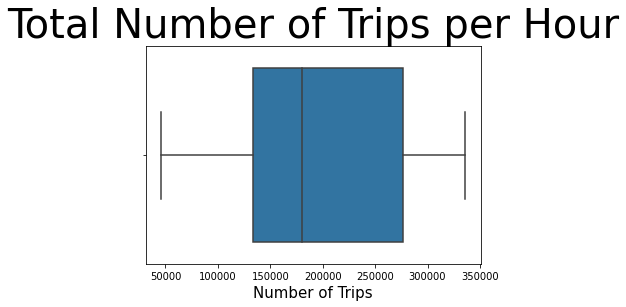

In [15]:
sns.boxplot(data=hourly.toPandas(), x = "Number of Trips")
plt.title("Total Number of Trips per Hour")

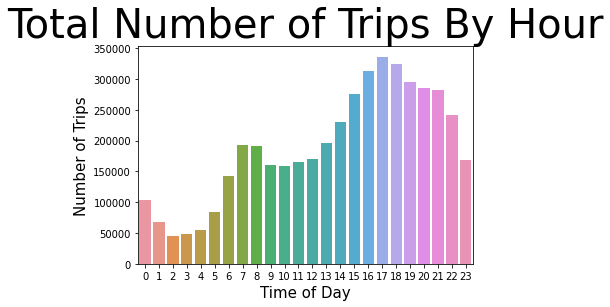

In [16]:
sns.barplot(data=hourly.toPandas(), x = "Time of Day", y="Number of Trips")
plt.title("Total Number of Trips By Hour")
plt.show()

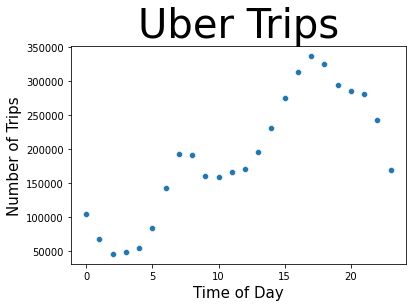

In [17]:
import seaborn as sns
test_df = hourly.toPandas()
sns.scatterplot(x = "Time of Day", y = "Number of Trips", data = test_df)
plt.title("Uber Trips")
plt.show()

In [34]:
daily = df.withColumn("Date/Time", F.date_trunc('dd', F.col('Date/Time')))
daily.show()

+-------------------+-------+--------+------+-----+----+
|          Date/Time|    Lat|     Lon|  Base|Count|hour|
+-------------------+-------+--------+------+-----+----+
|2014-09-01 00:00:00|40.2201|-74.0021|B02512|    1|   0|
|2014-09-01 00:00:00|  40.75|-74.0027|B02512|    1|   0|
|2014-09-01 00:00:00|40.7559|-73.9864|B02512|    1|   0|
|2014-09-01 00:00:00| 40.745|-73.9889|B02512|    1|   0|
|2014-09-01 00:00:00|40.8145|-73.9444|B02512|    1|   0|
|2014-09-01 00:00:00|40.6735|-73.9918|B02512|    1|   0|
|2014-09-01 00:00:00|40.7471|-73.6472|B02512|    1|   0|
|2014-09-01 00:00:00|40.6613|-74.2691|B02512|    1|   0|
|2014-09-01 00:00:00|40.3745|-73.9999|B02512|    1|   0|
|2014-09-01 00:00:00|40.7633|-73.9773|B02512|    1|   0|
|2014-09-01 00:00:00|40.7467|-73.6131|B02512|    1|   0|
|2014-09-01 00:00:00|40.8105|  -73.96|B02512|    1|   0|
|2014-09-01 00:00:00| 40.679|-74.0111|B02512|    1|   0|
|2014-09-01 00:00:00|40.4023|-73.9839|B02512|    1|   0|
|2014-09-01 00:00:00|40.7378|-7

In [35]:
daily = daily.groupBy(F.col("Date/Time").alias("Day")).agg(F.sum("Count").alias("Number of Trips"))
daily.show()

+-------------------+---------------+
|                Day|Number of Trips|
+-------------------+---------------+
|2014-07-30 00:00:00|          30740|
|2014-08-11 00:00:00|          22632|
|2014-07-16 00:00:00|          28607|
|2014-09-10 00:00:00|          35910|
|2014-08-12 00:00:00|          29646|
|2014-07-02 00:00:00|          26480|
|2014-07-12 00:00:00|          25936|
|2014-09-11 00:00:00|          36439|
|2014-08-28 00:00:00|          28597|
|2014-08-24 00:00:00|          22036|
|2014-08-17 00:00:00|          21209|
|2014-09-15 00:00:00|          29454|
|2014-09-12 00:00:00|          39540|
|2014-09-14 00:00:00|          28122|
|2014-09-02 00:00:00|          28831|
|2014-08-18 00:00:00|          21956|
|2014-09-28 00:00:00|          29656|
|2014-07-13 00:00:00|          21082|
|2014-07-10 00:00:00|          30541|
|2014-07-19 00:00:00|          25726|
+-------------------+---------------+
only showing top 20 rows



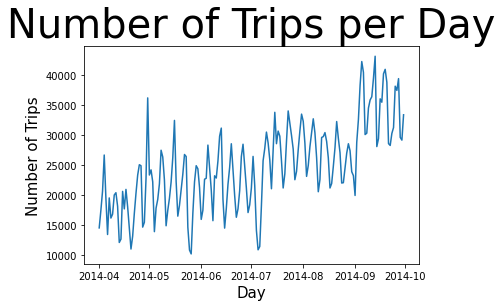

In [42]:
#sns.scatterplot(data=daily.toPandas(), x="Day", y = "Number of Trips")
sns.lineplot(data=daily.toPandas(), x="Day", y = "Number of Trips")
plt.title("Number of Trips per Day")
plt.show()